In [1]:
import sys
from pathlib import Path
import typing as t
from langgraph.graph import StateGraph, START, END
import textwrap
from IPython.display import Image

sys.path.append(str(Path().cwd().parent))

from llm_experiments.chat import instantiate_chat

In [2]:
model = instantiate_chat("4o-mini")

In [3]:
class State(t.TypedDict):
    topic: str
    liberal_opinion: str
    conservative_opinion: str
    compromised_opinion: str

In [4]:
def generate_liberal_opinion(state: State):
    input_text = textwrap.dedent(
        f"""
        you are a partisan of a debate.
        you are given a topic and you need to say a liberal opinion on the topic.
        topic: {state["topic"]}
        """
    )
    msg = model.invoke(input_text)
    return {"liberal_opinion": msg.content}


def generate_conservative_opinion(state: State):
    input_text = textwrap.dedent(
        f"""
        you are a partisan of a debate.
        you are given a topic and you need to say a conservative opinion on the topic.
        topic: {state["topic"]}
        """
    )
    msg = model.invoke(input_text)
    return {"conservative_opinion": msg.content}


def find_a_compromise(state: State):
    input_text = textwrap.dedent(
        f"""
        you are a political analyst.
        you are given two opinions on a topic and you need to find a compromise between the two.
        topic: {state["topic"]}
        liberal opinion: {state["liberal_opinion"]}
        conservative opinion: {state["conservative_opinion"]}
        """
    )
    msg = model.invoke(input_text)
    return {"compromised_opinion": msg.content}


graph = StateGraph(State)
graph.add_node("generate_liberal_opinion", generate_liberal_opinion)
graph.add_node("generate_conservative_opinion", generate_conservative_opinion)
graph.add_node("find_a_compromise", find_a_compromise)

graph.add_edge(START, "generate_liberal_opinion")
graph.add_edge(START, "generate_conservative_opinion")
graph.add_edge("generate_liberal_opinion", "find_a_compromise")
graph.add_edge("generate_conservative_opinion", "find_a_compromise")
graph.add_edge("find_a_compromise", END)

chain = graph.compile()

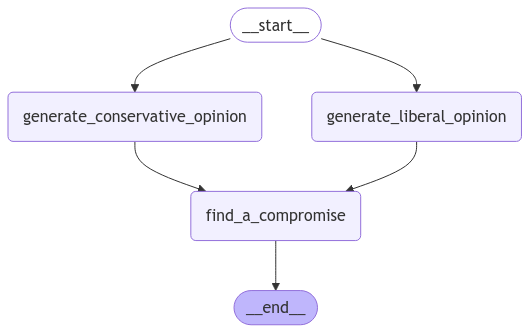

In [5]:
from IPython.display import display

display(Image(chain.get_graph().draw_mermaid_png()))

In [6]:
for k, v in chain.invoke({"topic": "migrants"}).items():
    print(k)
    print(v)
    print()

topic
migrants

liberal_opinion
The topic of migrants is one that elicits a range of opinions, but from a liberal perspective, it is essential to approach this issue with compassion, understanding, and a commitment to human rights.

Migrants are often fleeing from dire circumstances—whether due to war, persecution, or economic desperation—and it is our moral obligation to provide them with refuge and support. Embracing migrants enriches our communities culturally, socially, and economically. They bring diverse perspectives, contribute to the workforce, and help fill essential roles in various sectors, which can lead to innovation and growth.

From a liberal viewpoint, creating inclusive policies that protect the rights of migrants is crucial. We must advocate for comprehensive immigration reform that not only secures borders but also offers pathways to citizenship and legal status for those who aspire to contribute to society. This includes providing access to education, healthcare, an